## mmdchickparts
Classify chicken parts in breast, legs+tights and wings

## Description
The input image is a gray-scale image of many different chicken parts. The purpose is to classify them in breast, legs+tights, tights and wings.

In [1]:
import numpy as np
from PIL import Image
import ia870 as ia


# Reading
The input image is read.

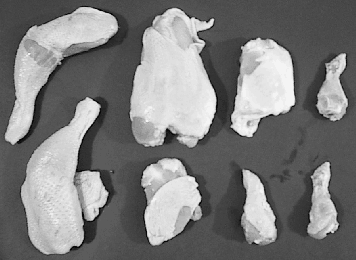

In [2]:
a_pil = Image.open('data/chickparts.tif').convert('L')
a_pil

In [3]:
a = np.array (a_pil)

# Thresholding and labeling
Convert to binary objects by thresholding and then labeling the objects. 

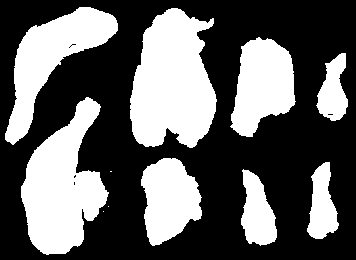

In [4]:
b = a>=100
Image.fromarray(b.astype(np.uint8)*255)

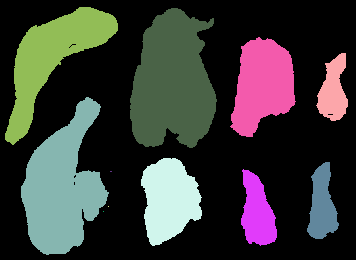

In [5]:
c = ia.ialabel(b)
Image.fromarray(ia.iaglblshow(c).transpose(1, 2, 0))

# Area measurement
Measure the area o each object and put this value as the pixel object value. For displaying purpose, overlay the background as red in the right image below. 

int32


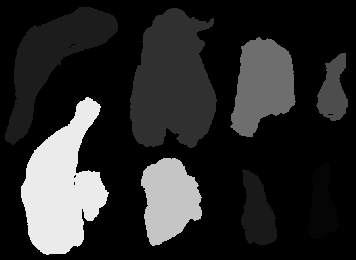

In [6]:
d = ia.iablob(c,'area');
print(d.dtype)
Temp = ia.iagshow(d).transpose(1, 2, 0)
Image.fromarray(Temp.astype(np.uint8))

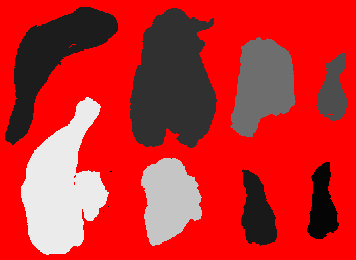

In [7]:
Temp = d==0
Image.fromarray(ia.iagshow(d.astype(np.uint8), Temp).transpose(1, 2, 0))

# Select the wings and tights

The wings are detected by finding objects with area 100 and 2500 pixels. The tights are selected as connected objects with area between 2500 and 5500 pixels. 

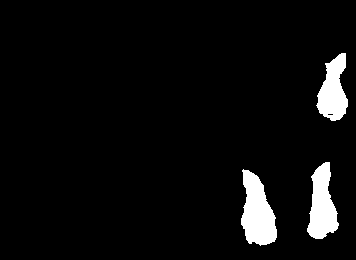

In [8]:
wings = ia.iacmp(np.uint32(100),'<=',d, '<=', np.uint32(2500))
Image.fromarray(wings.astype(np.uint8)*255)

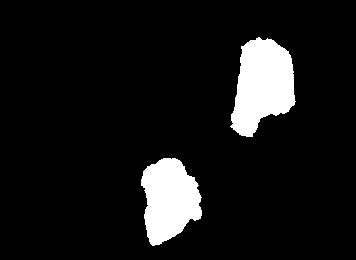

In [9]:
tights = ia.iacmp(np.uint32(2500),'<',d, '<=',np.uint32(5500));
Image.fromarray(tights.astype(np.uint8)*255)

# Select the legs and breast
The legs+tights have area larger than 5500 and smaller than 8500 pixels and the breast is the largest connected object with area larger than 8500 pixels 

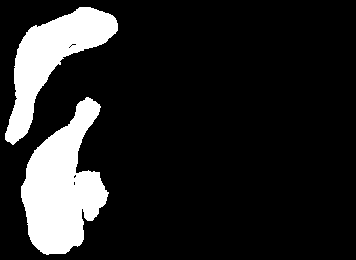

In [10]:
legs = ia.iacmp(np.uint32(5500), '<', d, '<=',np.uint32(8500));
Image.fromarray(legs.astype(np.uint8)*255)

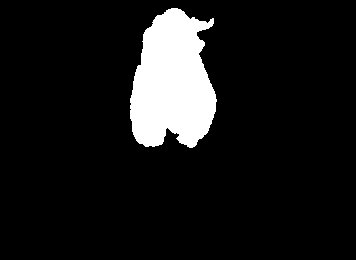

In [11]:
breast = ia.iacmp( d,'>', np.uint32(8500));
Image.fromarray(breast.astype(np.uint8)*255)

## Final display
Overlay the contour of the detected parts over the original image 

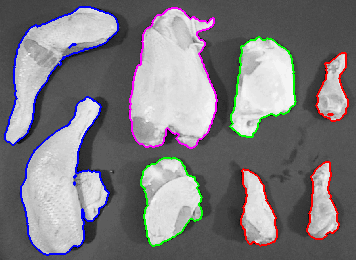

In [12]:
Image.fromarray(ia.iagshow(a,ia.iagradm(wings),ia.iagradm(tights),ia.iagradm(legs),ia.iagradm(breast)).transpose(1, 2, 0))